In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import optbinning as opt
%matplotlib inline
import pandas as pd
from sklearn.impute import SimpleImputer
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.preprocessing import OneHotEncoder, StandardScaler,KBinsDiscretizer, LabelEncoder
from sklearn.impute import SimpleImputer
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

(CVXPY) Feb 20 10:16:24 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Feb 20 10:16:24 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


In [2]:
data=pd.read_csv("../data/application_train_vf.csv",parse_dates=["date_mensuelle"], index_col=0)

In [69]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,date_mensuelle,date_annee,HAS_CHILDREN,AMT_CREDIT_TO_INCOME,AMT_CREDIT_NORM,BORROWER_AGE,BORROWER_SENIORITY,BORROWER_FIDELITY
0,333721,0,Cash loans,M,Y,Y,1,292500.0,1102500.0,"(16409.25, 42446.25]","(677889.0, 1273590.0]",Family,Working,Secondary / secondary special,Married,House / apartment,0.018209,-11763,-688,-500.0,-3325,9.0,1,0,1,Drivers,3.0,3,3,THURSDAY,9,0,0,0,Transport: type 3,NaN,0.616187,0.651260,0.2938,0.1995,0.9891,NaN,NaN,0.28,0.2414,0.3750,NaN,0.1346,NaN,0.0645,NaN,0.0028,0.2994,0.2070,0.9891,NaN,NaN,0.282,0.2414,0.3750,NaN,0.1377,NaN,0.0672,NaN,0.003,0.2967,0.1995,0.9891,NaN,NaN,0.28,0.2414,0.3750,NaN,0.137,NaN,0.0656,NaN,0.0029,NaN,block of flats,0.2379,Panel,No,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2013-01-01,2013,1,"(1.512, 5.304]","(-inf, 1.099]","(30.5, 38.5]","(-500.5, 6.5]","(-inf, 2.5]"
1,250254,0,Cash loans,F,N,Y,0,180000.0,270000.0,"(-inf, 16409.25]","(-inf, 282703.5]",Unaccompanied,Working,Higher education,Married,With parents,0.003122,-12460,-2988,-1576.0,-454,NaN,1,0,1,High skill tech staff,2.0,3,3,THURSDAY,10,0,0,0,University,NaN,0.548623,0.413597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-17.0,0.0,0.0,0.0,1.0,1.0,5.0,2013-01-01,2013,0,"(-inf, 1.512]","(-inf, 1.099]","(30.5, 38.5]","(6.5, 10.5]","(2.5, 16.5]"
2,265071,0,Cash loans,F,Y,N,2,67500.0,80865.0,"(-inf, 16409.25]","(-inf, 282703.5]",Children,Working,Secondary / secondary special,Married,House / apartment,0.018634,-11118,-907,-10654.0,-425,9.0,1,1,0,Laborers,4.0,2,2,MONDAY,10,0,0,0,Government,0.282297,0.582081,0.399676,0.1237,0.0493,0.9861,NaN,NaN,0.00,0.2759,0.1667,NaN,0.0678,NaN,0.1103,NaN,0.0000,0.1261,0.0511,0.9861,NaN,NaN,0.000,0.2759,0.1667,NaN,0.0694,NaN,0.1149,NaN,0.000,0.1249,0.0493,0.9861,NaN,NaN,0.00,0.2759,0.1667,NaN,0.069,NaN,0.1123,NaN,0.0000,NaN,block of flats,0.1210,"Stone, brick",No,0.0,0.0,0.0,0.0,-358.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-01,2013,2,"(-inf, 1.512]","(1.158, 1.317]","(-inf, 30.5]","(-500.5, 6.5]","(24.5, inf]"
3,227569,0,Cash loans,F,Y,Y,1,157500.0,1078200.0,"(16409.25, 42446.25]","(677889.0, 1273590.0]",Unaccompanied,Working,Secon

In [3]:
data["SK_ID_CURR"].value_counts().max()

1

In [4]:
data["NAME_CONTRACT_TYPE"].value_counts()

NAME_CONTRACT_TYPE
Cash loans         276940
Revolving loans     29167
Name: count, dtype: int64

In [5]:
pd.DataFrame(data.isna().mean())

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.000039


In [6]:
data["TARGET"].value_counts(normalize=True)

TARGET
0    0.923285
1    0.076715
Name: proportion, dtype: float64

#### Etudes des variables -- prédicteurs potentiels

In [7]:
data.dtypes

SK_ID_CURR                               int64
TARGET                                   int64
NAME_CONTRACT_TYPE                      object
CODE_GENDER                             object
FLAG_OWN_CAR                            object
FLAG_OWN_REALTY                         object
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
AMT_ANNUITY                            float64
AMT_GOODS_PRICE                        float64
NAME_TYPE_SUITE                         object
NAME_INCOME_TYPE                        object
NAME_EDUCATION_TYPE                     object
NAME_FAMILY_STATUS                      object
NAME_HOUSING_TYPE                       object
REGION_POPULATION_RELATIVE             float64
DAYS_BIRTH                               int64
DAYS_EMPLOYED                            int64
DAYS_REGISTRATION                      float64
DAYS_ID_PUBLISH                          int64
OWN_CAR_AGE  

In [8]:
pd.to_datetime(data["date_mensuelle"], format="%Y-%m-%d").dtypes

dtype('<M8[ns]')

In [9]:
data.nunique()

SK_ID_CURR                      306107
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2545
AMT_CREDIT                        5597
AMT_ANNUITY                      13667
AMT_GOODS_PRICE                   1000
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12571
DAYS_REGISTRATION                15687
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

In [10]:
drop_documents_cols=["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4" , 
"FLAG_DOCUMENT_5" , "FLAG_DOCUMENT_6","FLAG_DOCUMENT_7" ,              
"FLAG_DOCUMENT_8" , "FLAG_DOCUMENT_9","FLAG_DOCUMENT_10"  ,"FLAG_DOCUMENT_11" , "FLAG_DOCUMENT_12",              
"FLAG_DOCUMENT_13" ,"FLAG_DOCUMENT_14" ,"FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16" ,
"FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18","FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"]

In [11]:
data.drop(columns=drop_documents_cols, inplace=True)

In [12]:
def convert_numeric_to_category(df: pd.DataFrame):
    for colname in df.columns.tolist():
        if (df[colname].dtype=="number") & (df[colname].nunique() <=10):
            df[colname]=df[colname].astype("category")
            pass
        else:
            pass

In [13]:
convert_numeric_to_category(data)

In [14]:
data["date_annee"]=data["date_mensuelle"].dt.year

In [15]:
out_of_sample_data=data[data["date_annee"]==2020]
data=data[data["date_annee"]<2020]


In [16]:
out_of_sample_data["TARGET"].value_counts(normalize=True)


TARGET
0    0.920863
1    0.079137
Name: proportion, dtype: float64

In [17]:
data["TARGET"].value_counts(normalize=True)

TARGET
0    0.923632
1    0.076368
Name: proportion, dtype: float64

In [70]:
data.dtypes

SK_ID_CURR                               int64
TARGET                                   int64
NAME_CONTRACT_TYPE                      object
CODE_GENDER                             object
FLAG_OWN_CAR                            object
FLAG_OWN_REALTY                         object
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
AMT_ANNUITY                           category
AMT_GOODS_PRICE                       category
NAME_TYPE_SUITE                         object
NAME_INCOME_TYPE                        object
NAME_EDUCATION_TYPE                     object
NAME_FAMILY_STATUS                      object
NAME_HOUSING_TYPE                       object
REGION_POPULATION_RELATIVE             float64
DAYS_BIRTH                               int64
DAYS_EMPLOYED                            int64
DAYS_REGISTRATION                      float64
DAYS_ID_PUBLISH                          int64
OWN_CAR_AGE  

In [18]:
categorical_vars=data.select_dtypes(include="object").columns.tolist()

In [19]:
numerical_vars=data.select_dtypes(include="number").columns.tolist()

In [20]:
binary_vars=[var for var in numerical_vars if (data[var].nunique()==2)&(var !="TARGET")]

In [21]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [22]:
from scipy.stats import mannwhitneyu , anderson, f_oneway
import statsmodels.api as sm

In [23]:
def mannwhitney_test(df:pd.DataFrame,variable:str,target:str):
    # Séparer les données en deux groupes en fonction de la variable cible
    group_1 = df[df[target] == 0]
    group_2 = df[df[target] == 1]

    stat, p_value = mannwhitneyu(group_1[variable].dropna(), group_2[variable].dropna())
    # Afficher les résultats
    print(f"Variable: {variable}")
    print(f"Mann-Whitney U-statistic: {stat}")
    print(f"P-value: {p_value}")
    print(10*"===")
    
    pass

In [24]:
def calculate_information_value_from_contingency_table(contingency_table):
    """
    Calculer l'Information Value à partir d'une table de contingence.
    
    Args:
        contingency_table (pd.DataFrame): La table de contingence entre la variable et la target.
        
    Returns:
        float: L'Information Value calculé.
    """
    non_event_rate=contingency_table.iloc[0]/(contingency_table.iloc[0]+contingency_table.iloc[1])
    event_rate=contingency_table.iloc[1]/(contingency_table.iloc[0]+contingency_table.iloc[1])
    iv=0
    if (non_event_rate.min() > 0) & (event_rate.mean() >0) :
        for col in non_event_rate.index:
            iv += (event_rate[col] - non_event_rate[col])*np.log(event_rate[col] / non_event_rate[col])

    return iv

In [25]:

def show_volume_stability_overtime(colname:str):
        # Calcul des pourcentages pour chaque modalité au fil du temps
    resultats = data[[colname, "date_annee"]].groupby(by=["date_annee"]).value_counts(normalize=True).unstack().fillna(0)

    # Affichage des lineplots
    sns.set(style="whitegrid")
    resultats.plot(kind='line', marker='o', markersize=8)
    plt.title('Pourcentage de chaque modalité au fil du temps')
    plt.hlines(y=0.05, xmin=data["date_annee"].min(), xmax=data["date_annee"].max())
    plt.xlabel('Temps')
    plt.ylabel('Pourcentage')
    plt.legend(title=f"{colname}")
    plt.show()

In [26]:
def show_risk_stability_overtime(colname:str):
    result = data.groupby([colname, "date_annee"])['TARGET'].value_counts(normalize=True).unstack().fillna(0)[1]

    # Tracer le lineplot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=result.index.get_level_values("date_annee"), y=result.values, hue=result.index.get_level_values(f"{colname}"), marker='o')

    # Ajouter des étiquettes et un titre
    plt.xlabel('date_annee')
    plt.ylabel('Taux de défaut')
    plt.title(f"Taux de défaut en fonction de {colname} et année")

    # Ajouter une légende
    plt.legend(title=f"{colname}")

    # Afficher le graphique
    plt.show()
    

#### Test de stabilité en risque des variables binaires

In [27]:
binary_vars

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

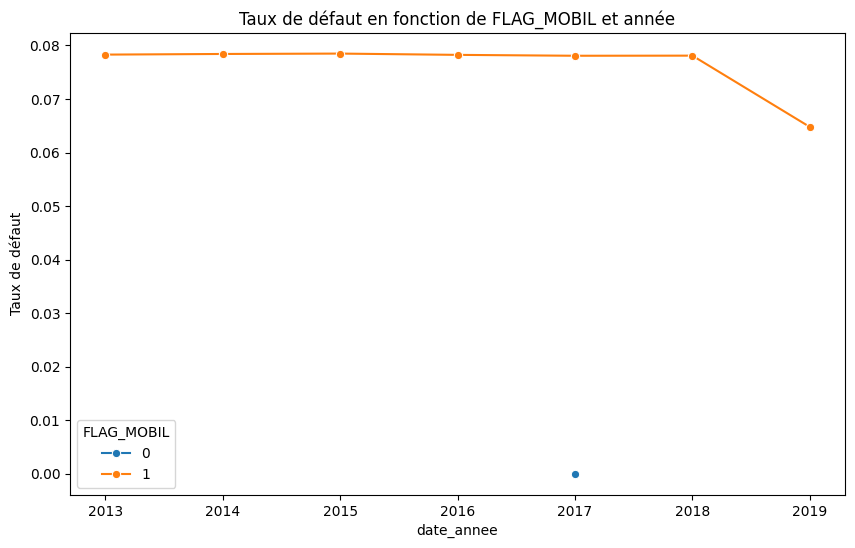

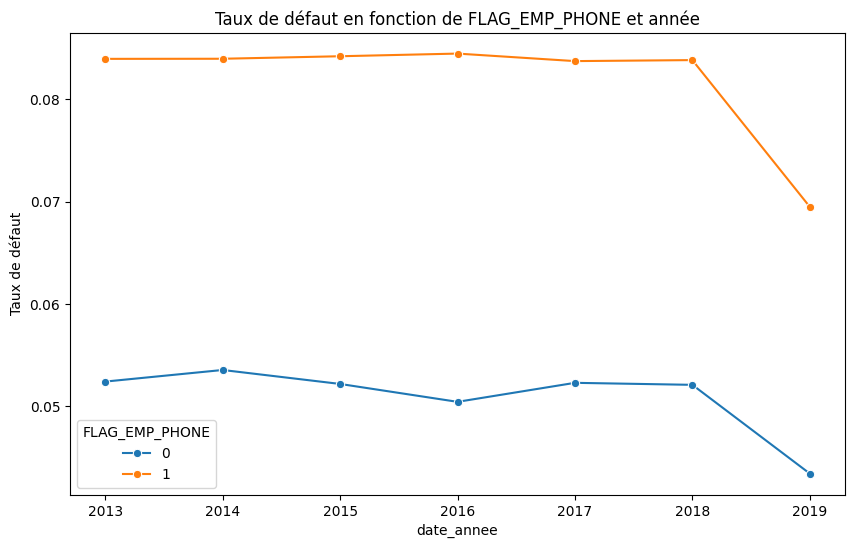

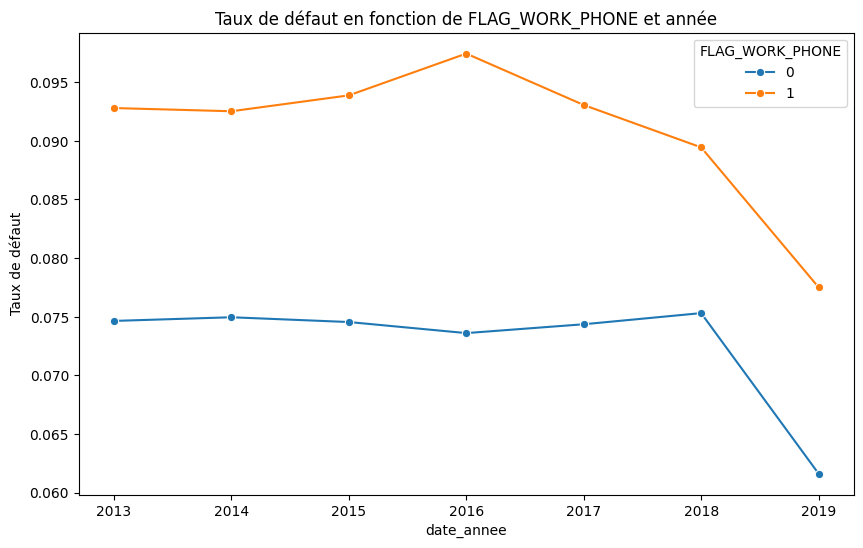

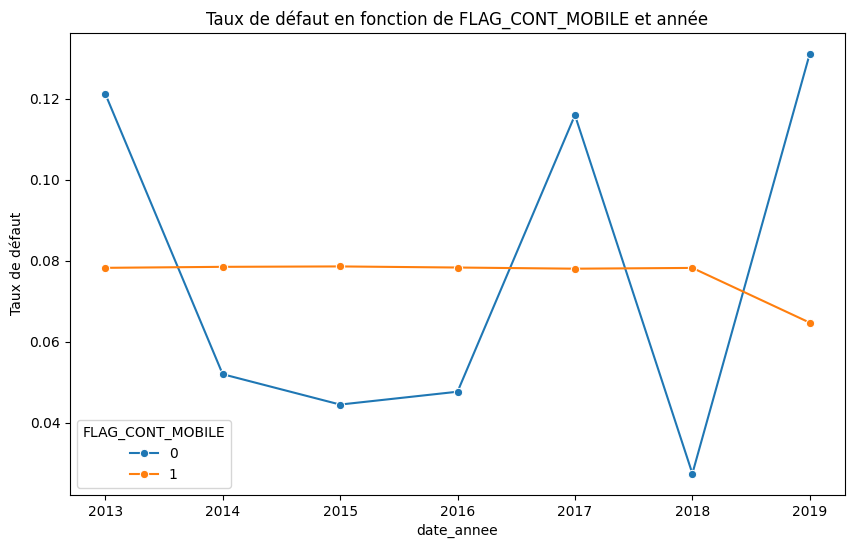

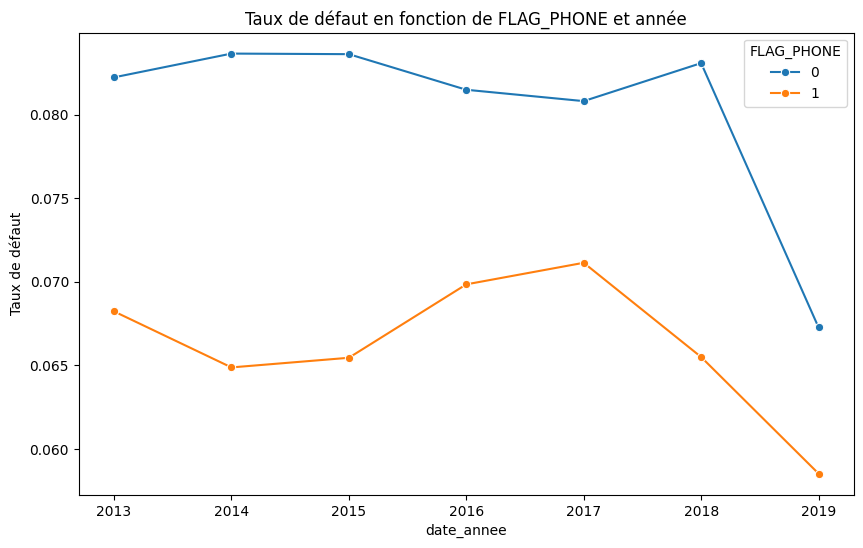

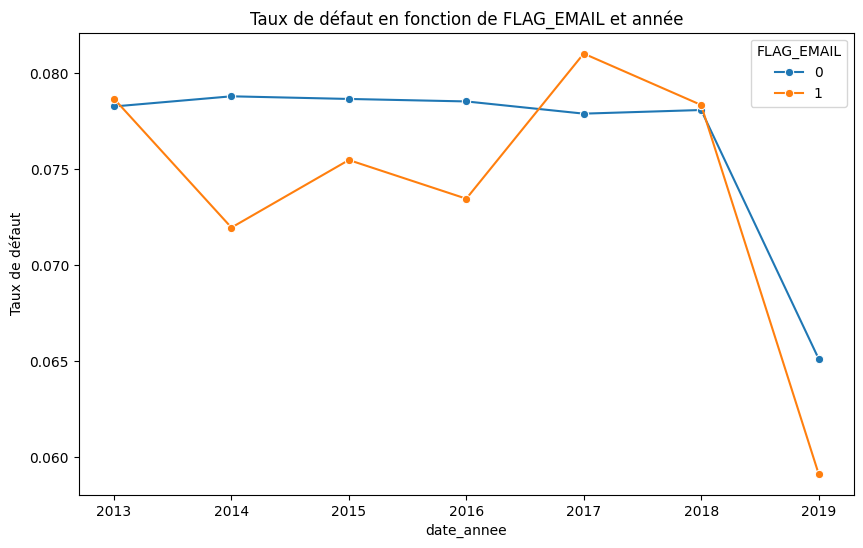

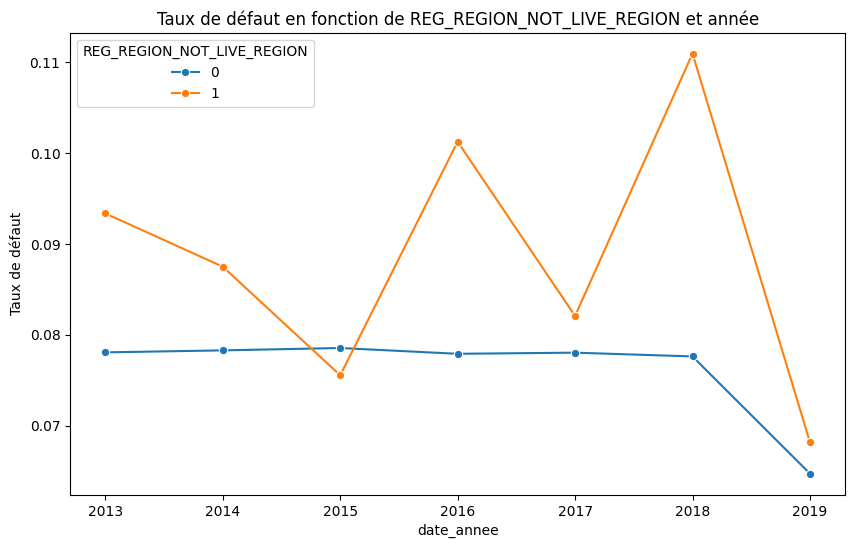

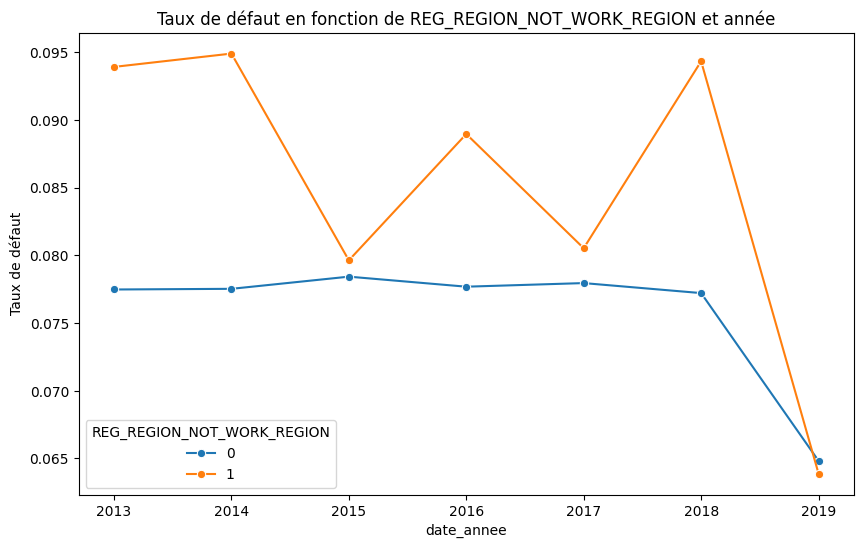

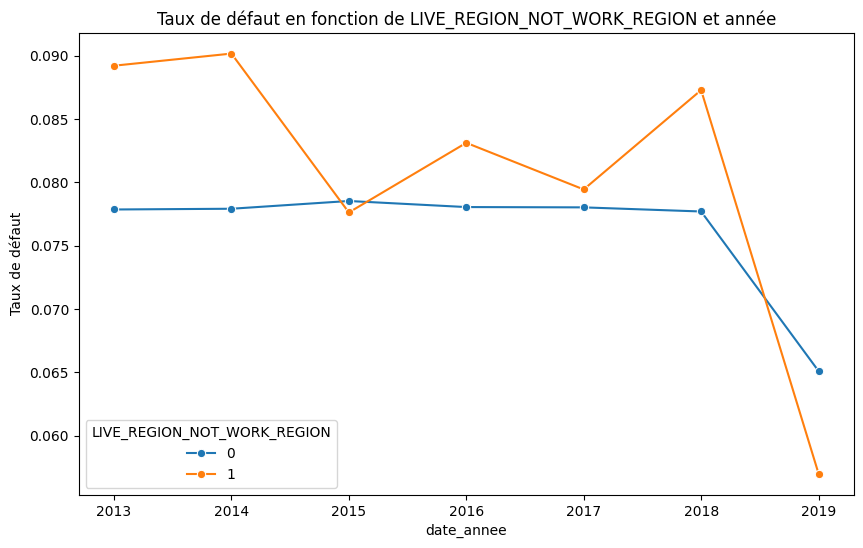

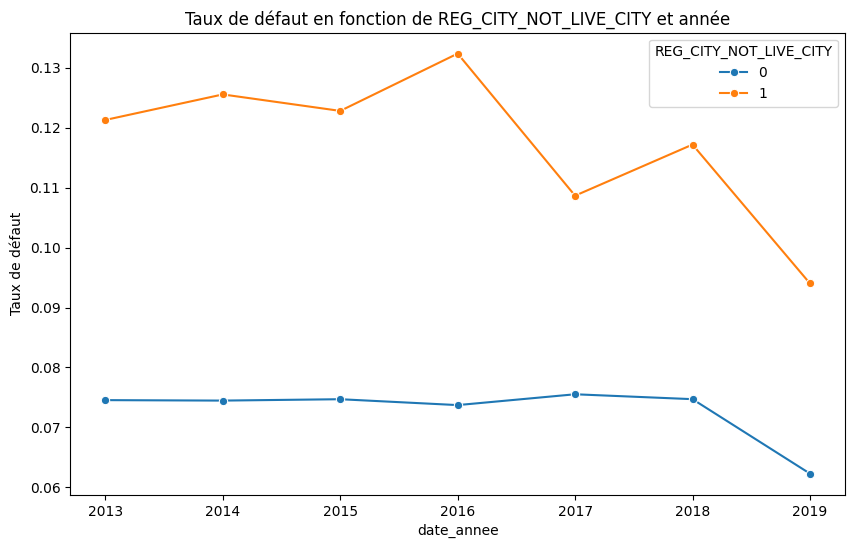

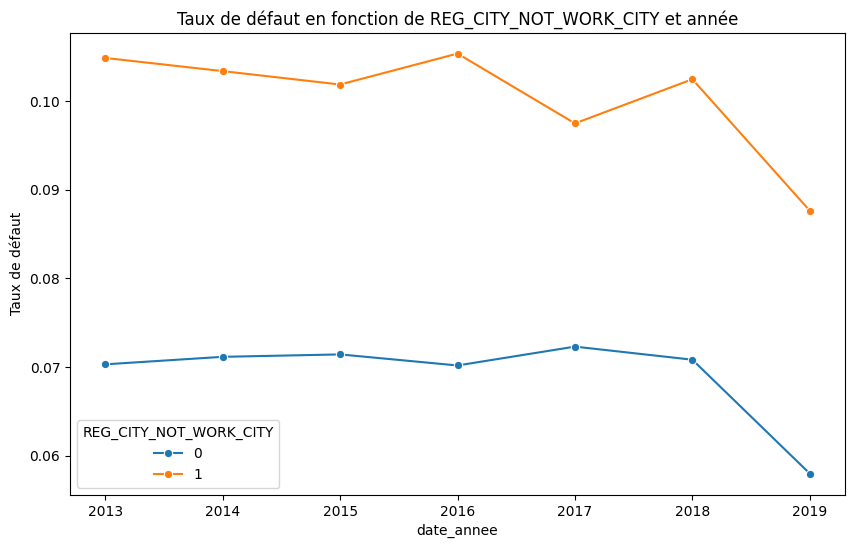

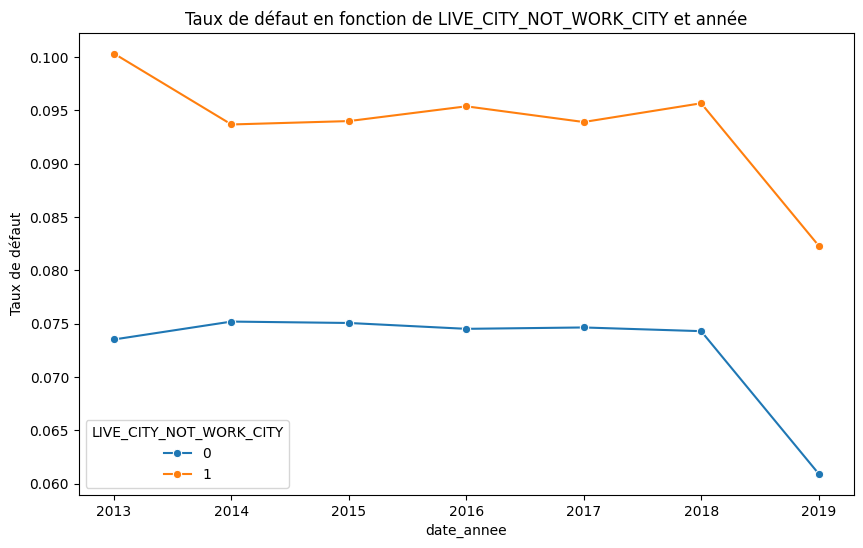

In [28]:
for var in binary_vars:
    show_risk_stability_overtime(var)

In [29]:
#### variables à écarter : flag_mobil, flag_cont_mobil, flag_email, reg_region_not_live_region, reg_region_not_work_region,live_region_not_work_region, 

In [30]:
binary_risk_non_stable_vars=["FLAG_MOBIL", "FLAG_CONT_MOBILE", "FLAG_EMAIL", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION"]

In [31]:
binary_vars

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [32]:
from scipy.stats import chi2_contingency

In [33]:

for col in binary_vars:
    print(col)
    print(chi2_contingency(pd.crosstab(data["TARGET"], data[col].dropna())))
    print(60*"=")

FLAG_MOBIL
Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[9.23631990e-01, 2.47295076e+05],
       [7.63680096e-02, 2.04469236e+04]]))
FLAG_EMP_PHONE
Chi2ContingencyResult(statistic=541.1118770439443, pvalue=1.0803051842837344e-119, dof=1, expected_freq=array([[ 44627.12687913, 202668.87312087],
       [  3689.87312087,  16757.12687913]]))
FLAG_WORK_PHONE
Chi2ContingencyResult(statistic=200.62867268099427, pvalue=1.522798701766882e-45, dof=1, expected_freq=array([[198169.86169573,  49126.13830427],
       [ 16385.13830427,   4061.86169573]]))
FLAG_CONT_MOBILE
Chi2ContingencyResult(statistic=0.010509627304075248, pvalue=0.918346737910523, dof=1, expected_freq=array([[4.60892363e+02, 2.46835108e+05],
       [3.81076368e+01, 2.04088924e+04]]))
FLAG_PHONE
Chi2ContingencyResult(statistic=152.80251594616982, pvalue=4.2309016724815076e-35, dof=1, expected_freq=array([[177762.21286831,  69533.78713169],
       [ 14697.78713169,   5749.21286831]]))
FLAG_EMAIL
Chi2C

#### Test de stabilité en volume des variables binaires

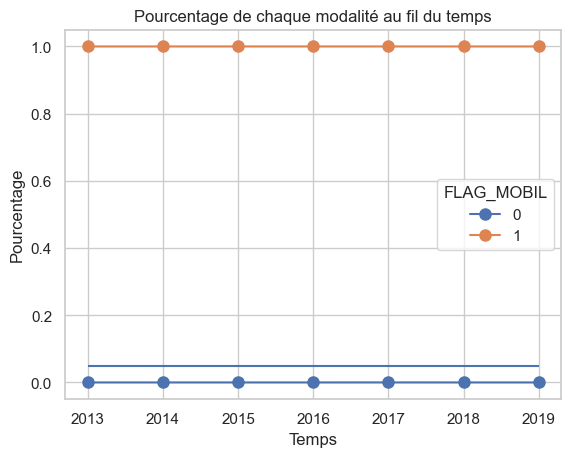

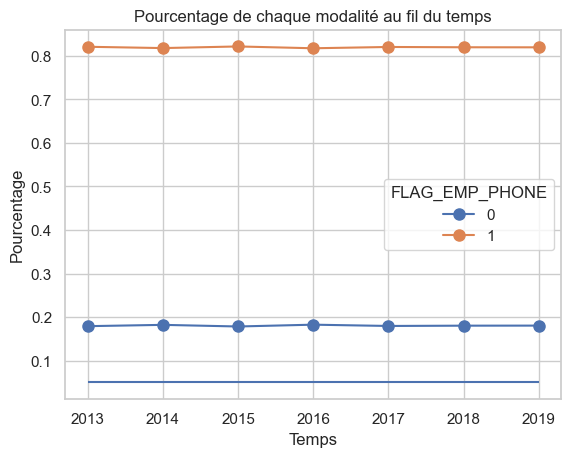

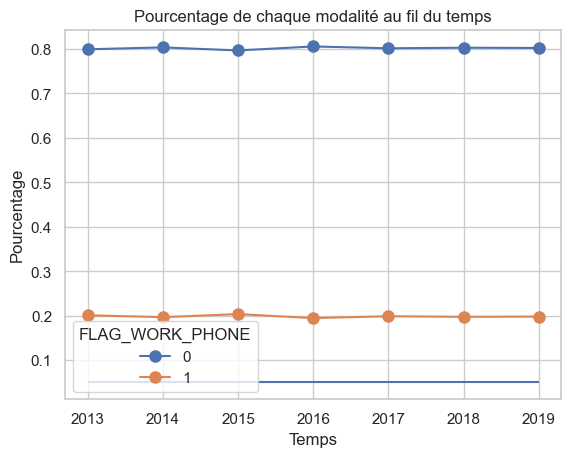

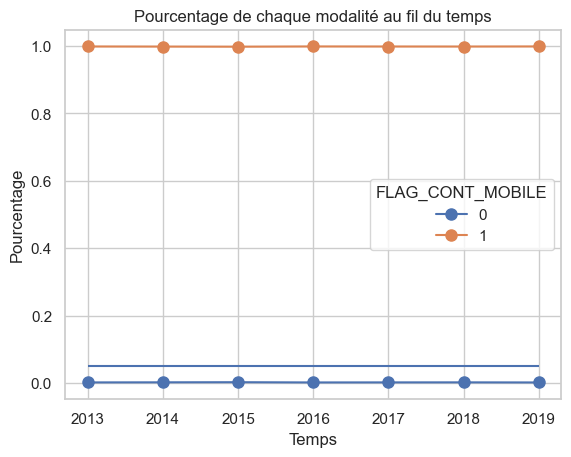

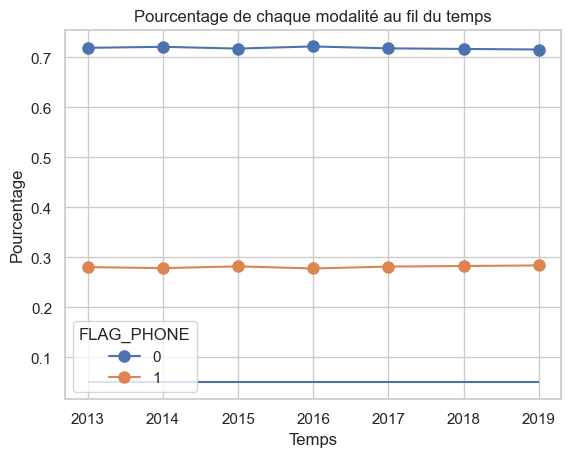

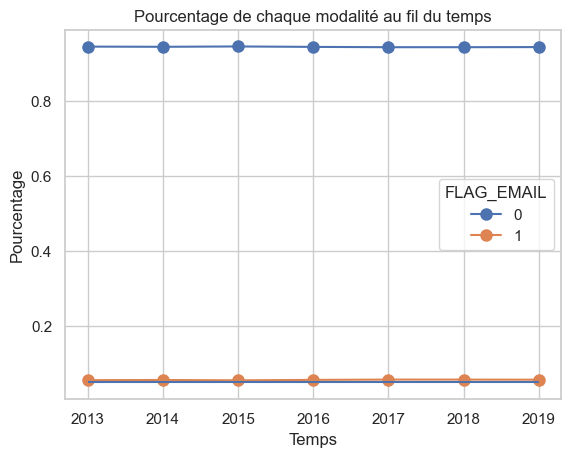

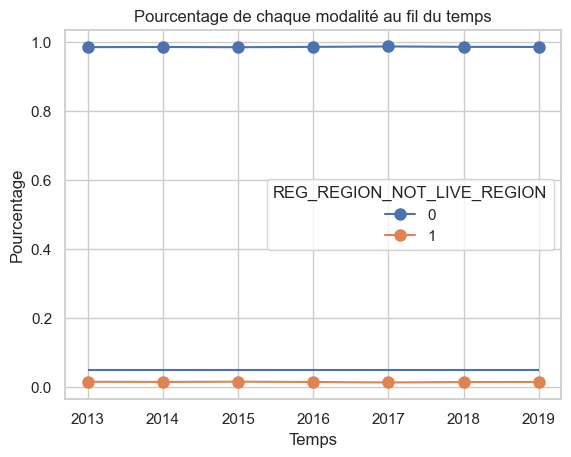

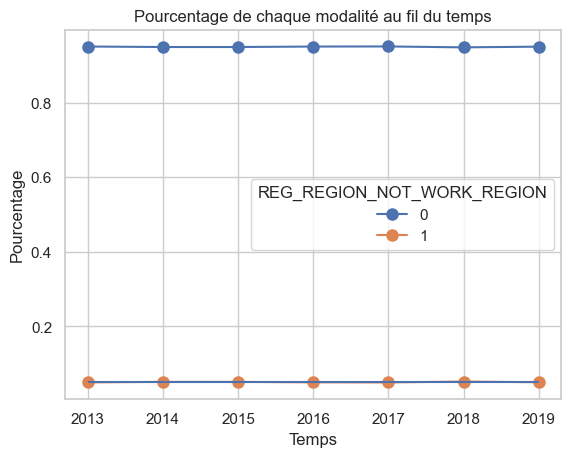

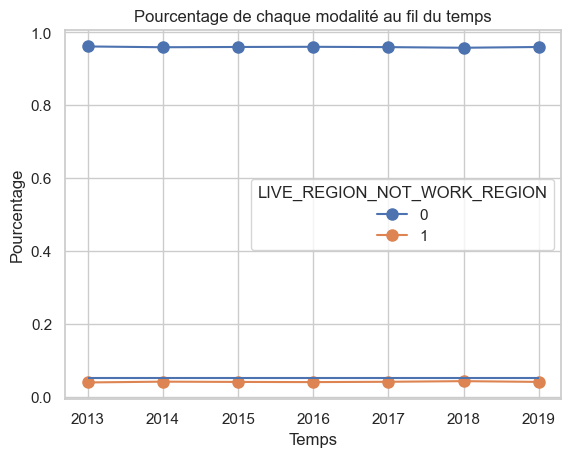

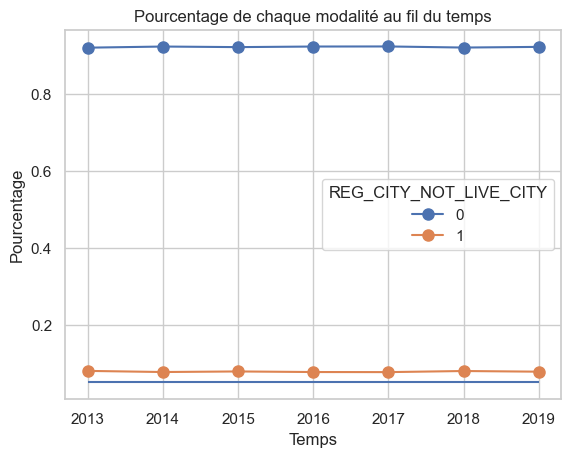

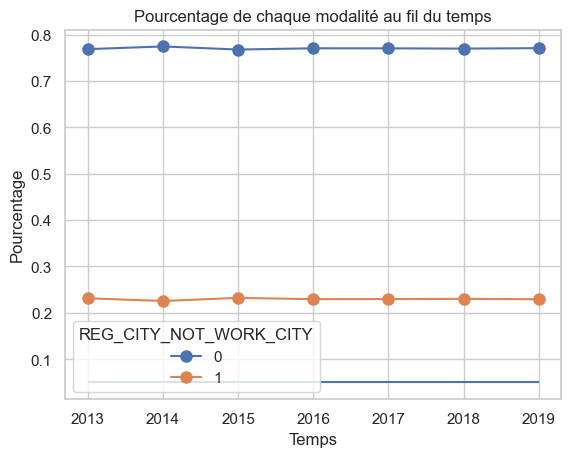

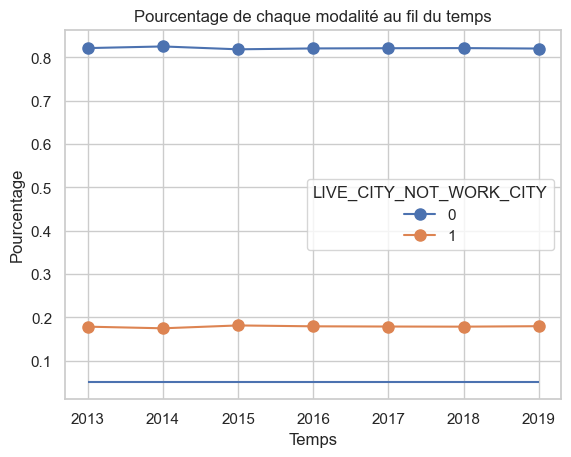

In [34]:
for var in binary_vars:
    show_volume_stability_overtime(var)

In [35]:
#### variables à virer : flag_mobil , flag_cont_mobil,reg_region_not_live_region, live_region_not_work_region

In [36]:
binary_volume_non_stable_vars=["FLAG_MOBIL", "FLAG_CONT_MOBILE","REG_REGION_NOT_LIVE_REGION", "LIVE_REGION_NOT_WORK_REGION"]

In [37]:
# variables à virer parmi les binaires:
binary_non_stable_vars=list(set(binary_volume_non_stable_vars+binary_risk_non_stable_vars))

In [38]:
binary_vars=list(filter(lambda x : x not in binary_non_stable_vars,binary_vars))

In [39]:
data.drop(columns=binary_non_stable_vars, inplace=True)

In [40]:
numerical_vars

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

#### Model Benchmark

In [41]:
import statsmodels.api as sm
data_train, data_test=train_test_split(data, test_size=0.3, stratify=data["TARGET"])

In [42]:
model=sm.Logit.from_formula(formula="TARGET ~ LIVE_CITY_NOT_WORK_CITY + REG_CITY_NOT_WORK_CITY + FLAG_EMP_PHONE", data=data_train).fit()
predictions=model.predict(data_test)
2*roc_auc_score(data_test["TARGET"], predictions) - 1

Optimization terminated successfully.
         Current function value: 0.267810
         Iterations 7


0.11274598306830641

#### Test de stabilité des variables catégorielles à faible modalité (2-4)

In [43]:
numerical_vars=list(filter(lambda x: x not in binary_non_stable_vars, numerical_vars))

In [44]:
low_category_categorical_vars=[var for var in categorical_vars+numerical_vars if  (var not in binary_vars+binary_non_stable_vars+["TARGET"]) & (data[var].nunique()>=2) & (data[var].nunique()<=4)]

In [45]:
low_category_categorical_vars

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY']

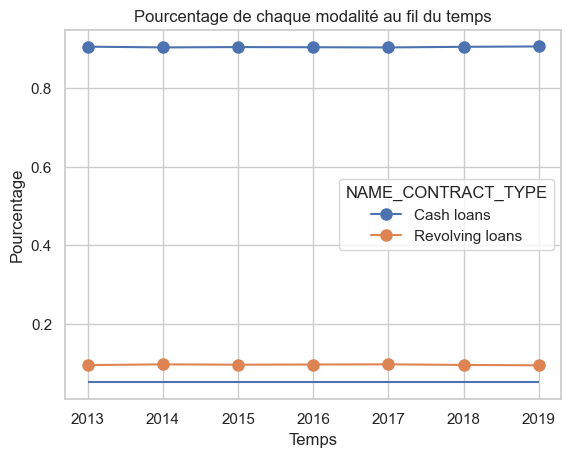

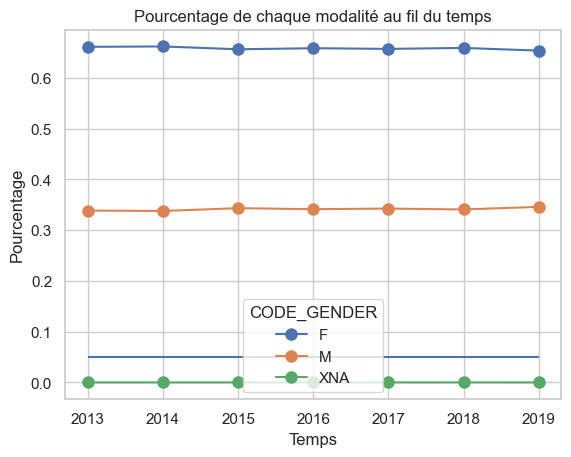

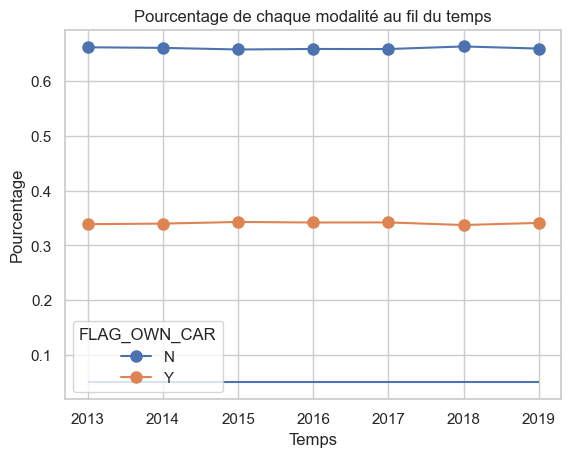

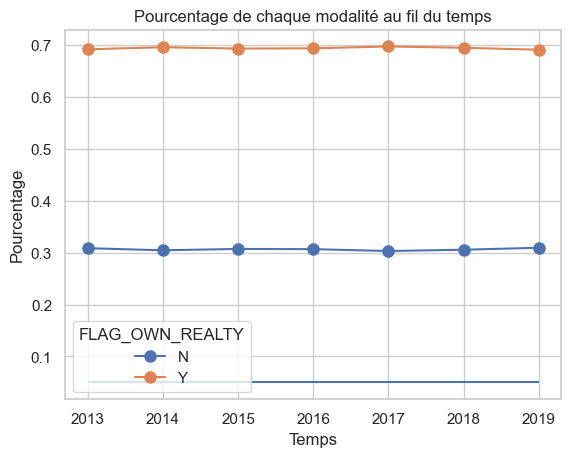

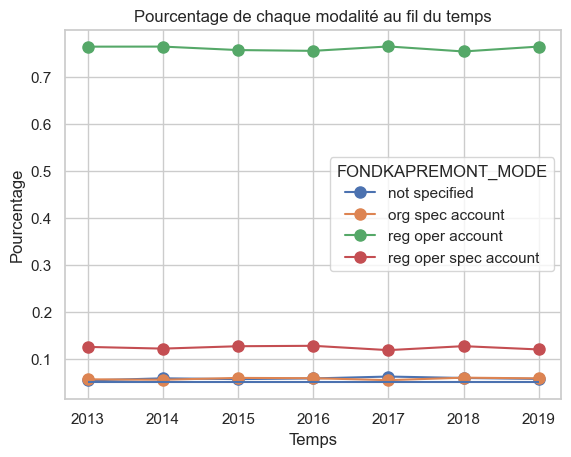

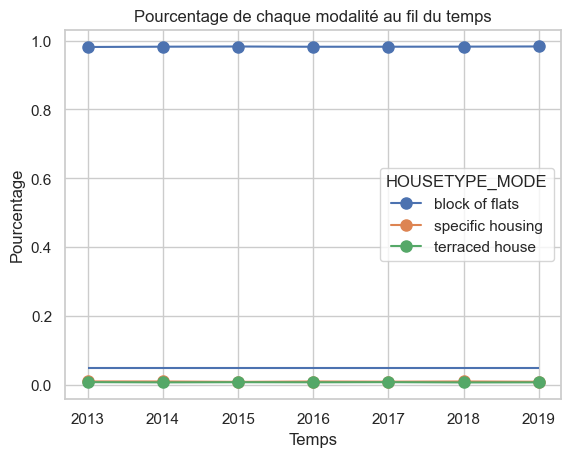

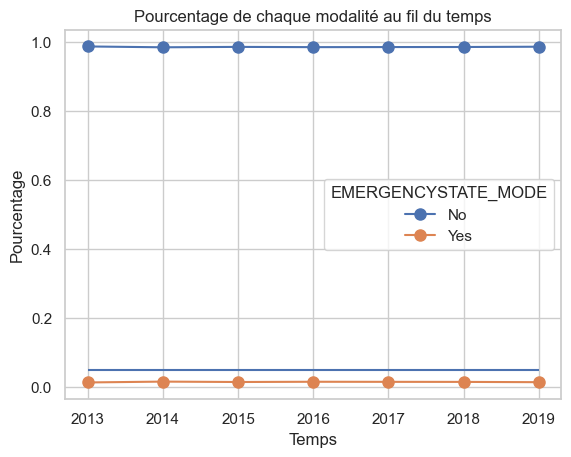

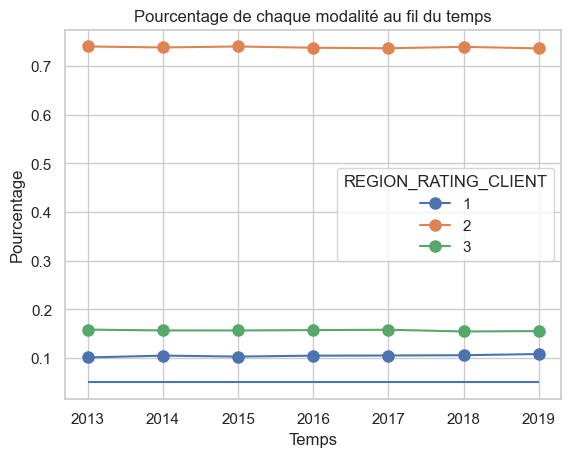

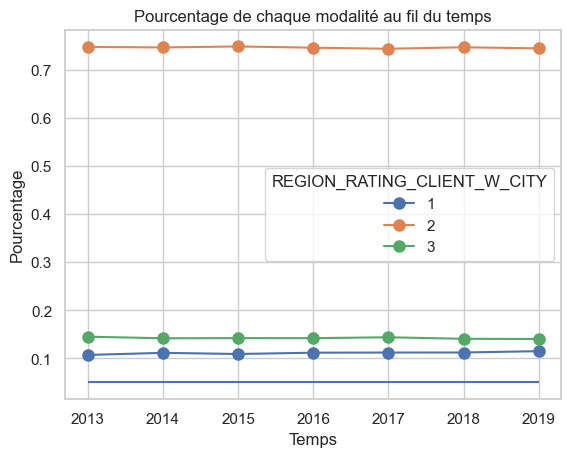

In [46]:
for colname in low_category_categorical_vars:
    show_volume_stability_overtime(colname)

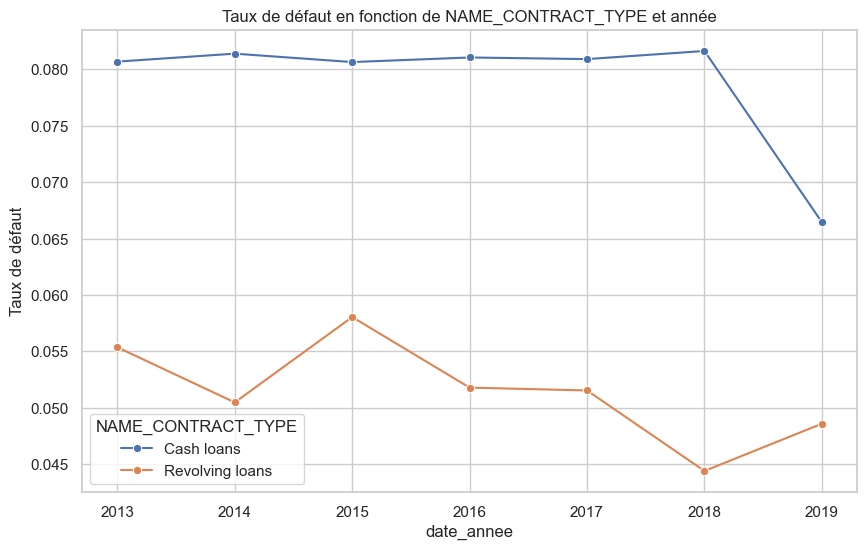

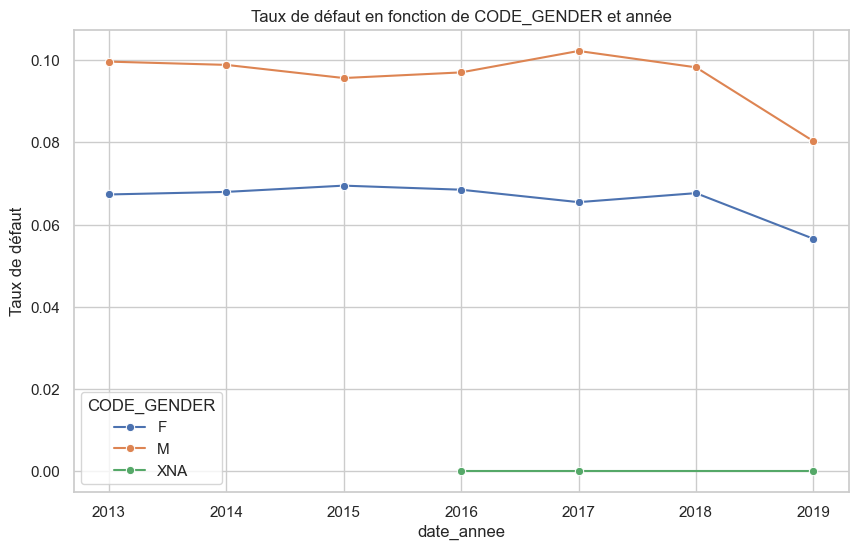

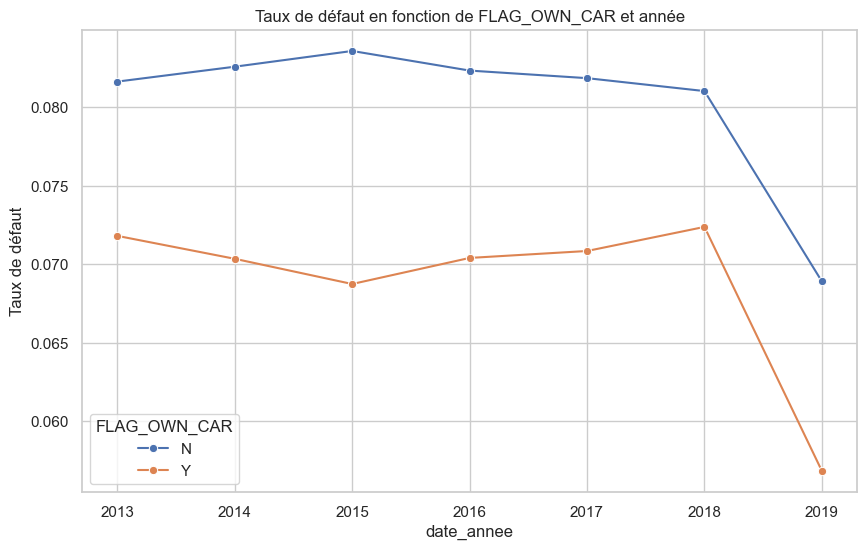

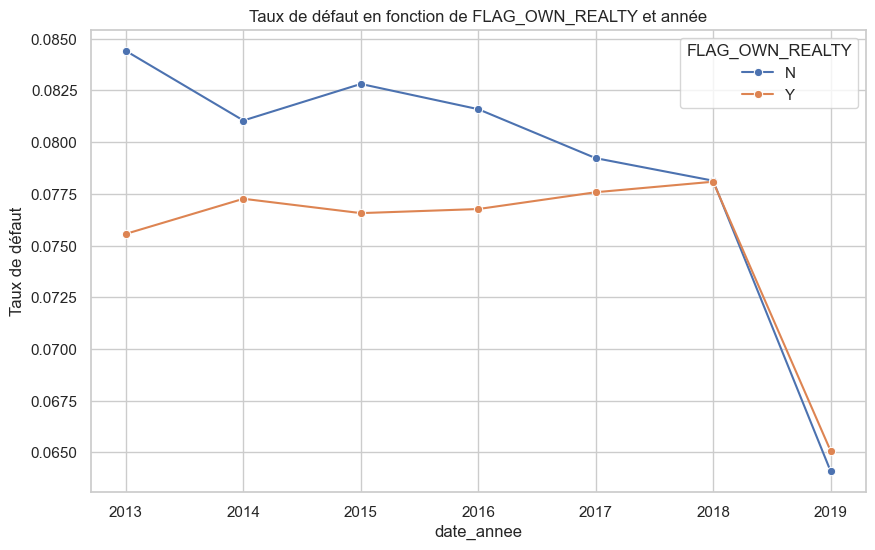

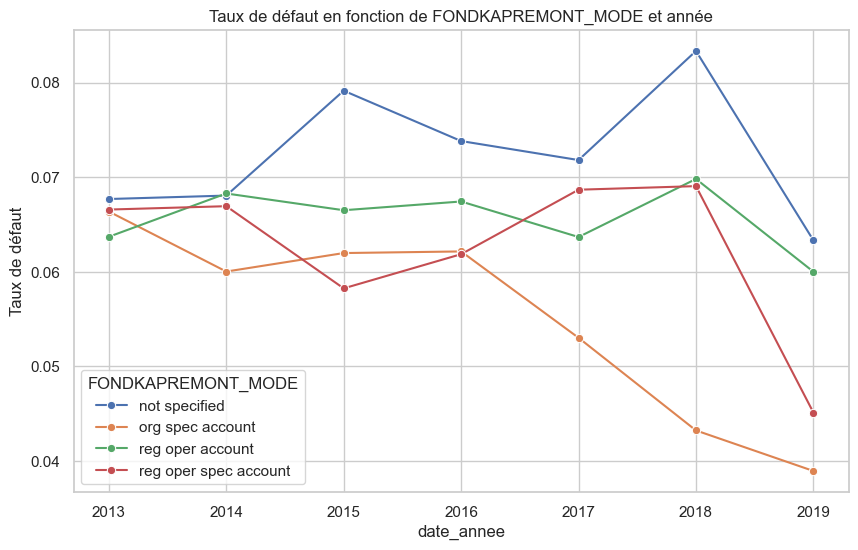

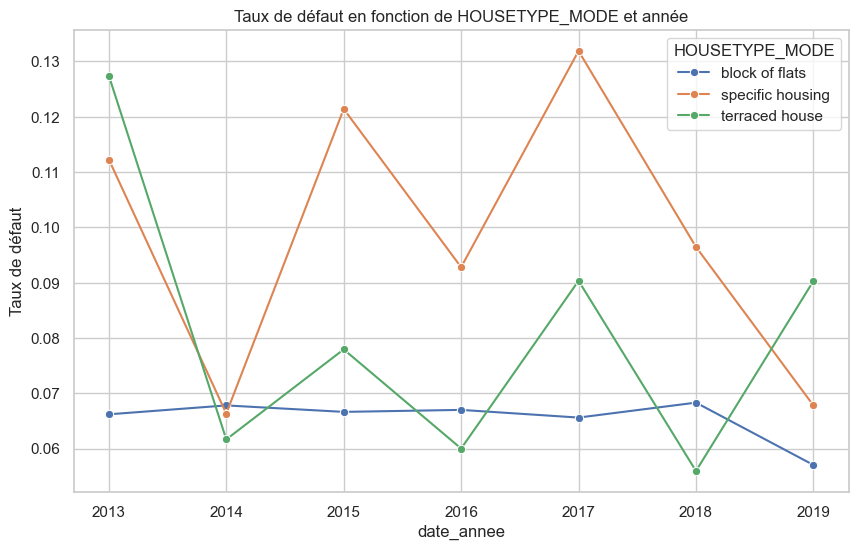

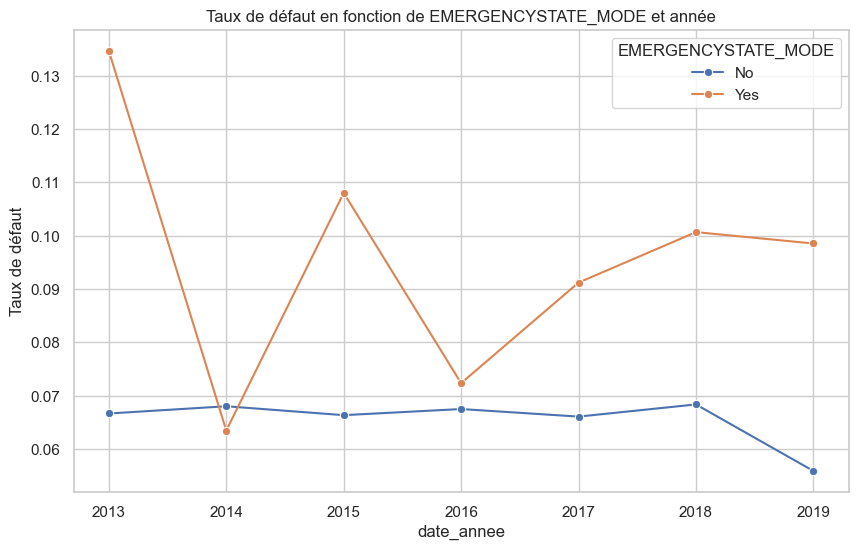

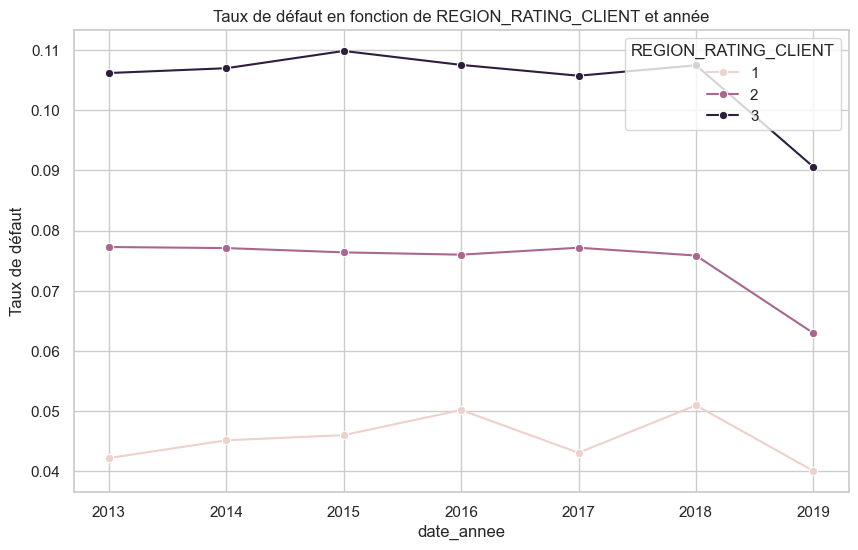

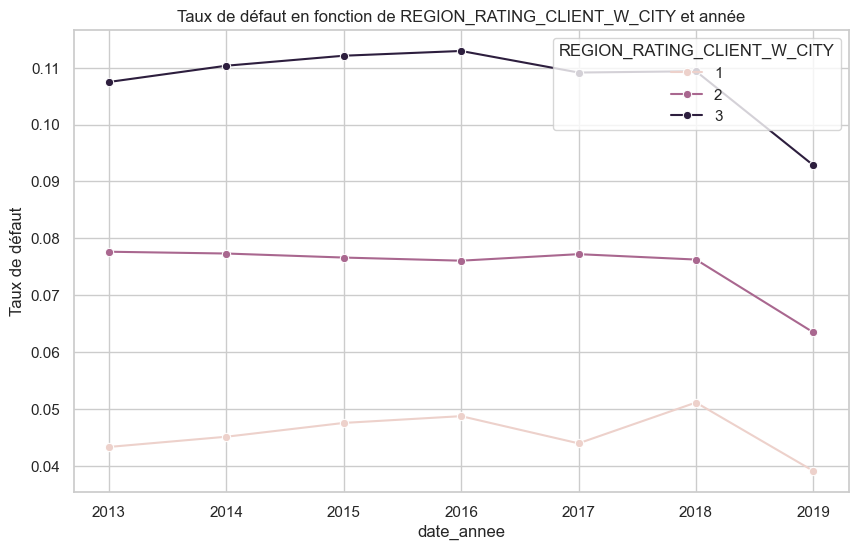

In [47]:
for col in low_category_categorical_vars:
    show_risk_stability_overtime(col)

#### Test de stabilité des autres variables catégorielles

#### Test de combinaison de variables numériques

In [48]:
data["AMT_INCOME_TOTAL"].describe()

count    2.677430e+05
mean     1.688156e+05
std      2.511375e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.462500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [49]:
data["CNT_CHILDREN"]

0         1
1         0
2         2
3         1
4         1
         ..
267738    0
267739    0
267740    0
267741    0
267742    1
Name: CNT_CHILDREN, Length: 267743, dtype: int64

In [50]:
# FEATURE ENGINEERING
data["HAS_CHILDREN"]=data["CNT_CHILDREN"].apply(lambda x : x if x<=1 else 2)

In [51]:
data["AMT_CREDIT_TO_INCOME"]=data["AMT_CREDIT"]/data["AMT_INCOME_TOTAL"]

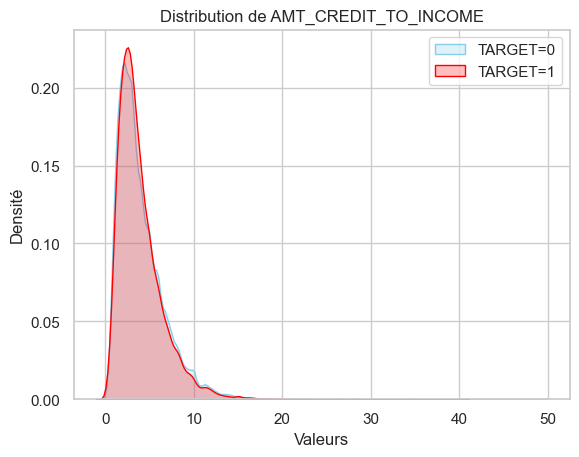

In [52]:
# Plot des distributions kernel pour TARGET==0 et TARGET==1
sns.kdeplot(data.loc[data["TARGET"]==0, "AMT_CREDIT_TO_INCOME"], color='skyblue', label='TARGET=0', fill=True)
sns.kdeplot(data.loc[data["TARGET"]==1, "AMT_CREDIT_TO_INCOME"], color='red', label='TARGET=1', fill=True)

plt.title("Distribution de AMT_CREDIT_TO_INCOME")
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.legend()
plt.show()


In [53]:
data["AMT_CREDIT_NORM"]=data["AMT_CREDIT"]/data["AMT_GOODS_PRICE"]

In [54]:
data["BORROWER_AGE"]=-data["DAYS_BIRTH"]//365
data["BORROWER_SENIORITY"]=-data["DAYS_EMPLOYED"]//365
data["BORROWER_FIDELITY"]=-data["DAYS_REGISTRATION"]//365

In [55]:
(data["DAYS_EMPLOYED"] > 0).sum()

48306

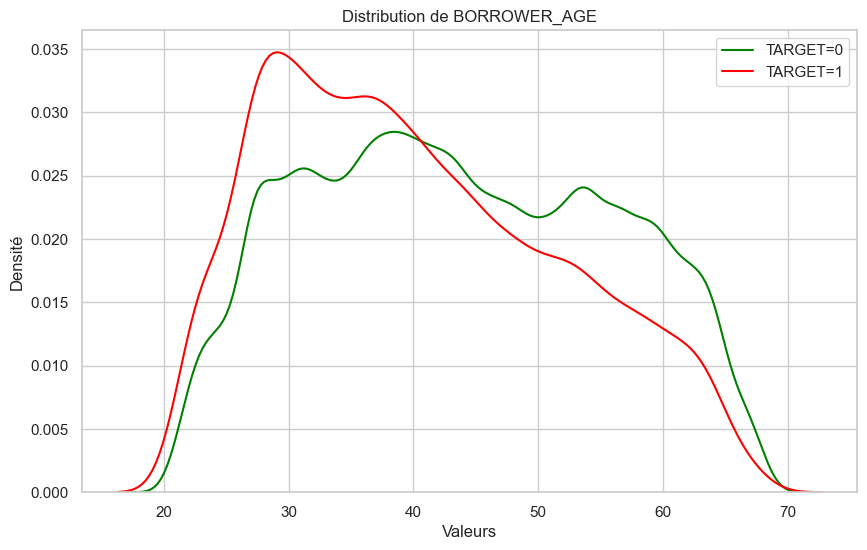

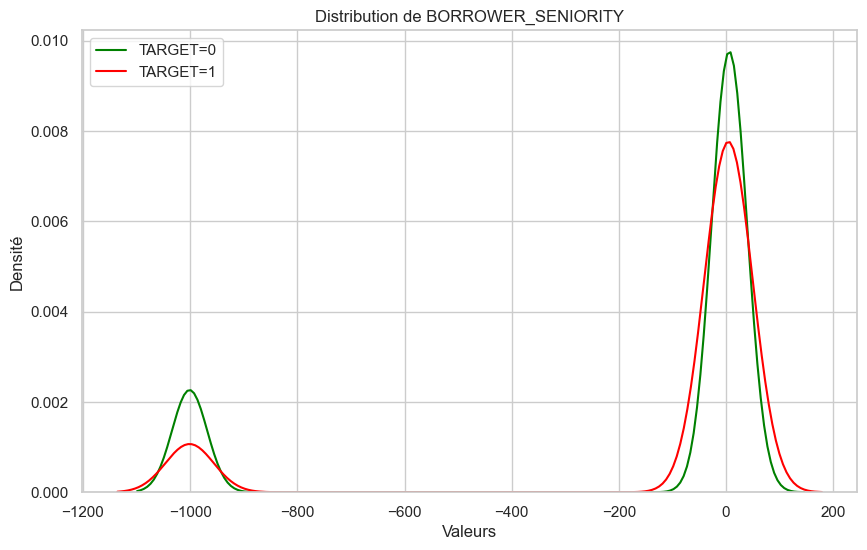

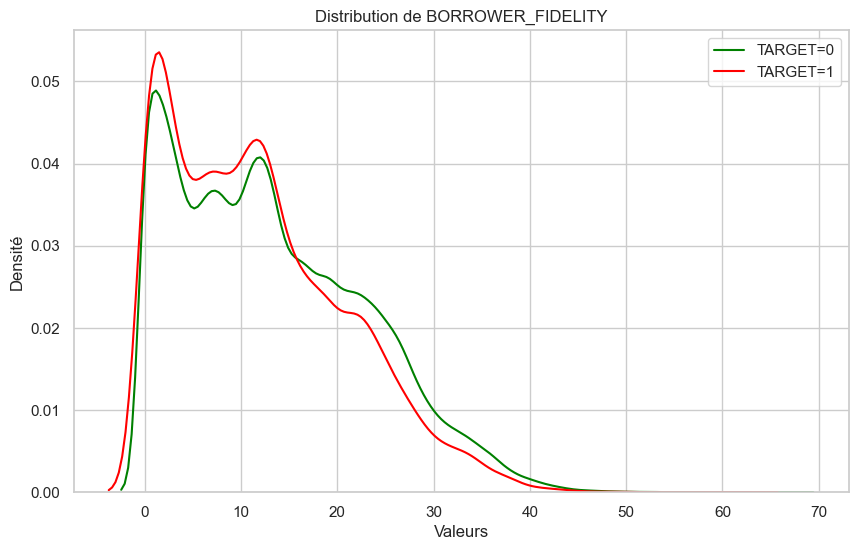

In [56]:
for col in ["BORROWER_AGE","BORROWER_SENIORITY","BORROWER_FIDELITY"]:
    plt.figure(figsize=(10, 6))
    # Plot des distributions kernel pour TARGET==0 et TARGET==1
    sns.kdeplot(data.loc[data["TARGET"]==0, col], color='green', label='TARGET=0', fill=False)
    sns.kdeplot(data.loc[data["TARGET"]==1, col], color='red', label='TARGET=1', fill=False)

    plt.title(f"Distribution de {col}")
    plt.xlabel('Valeurs')
    plt.ylabel('Densité')
    plt.legend()
    plt.show()

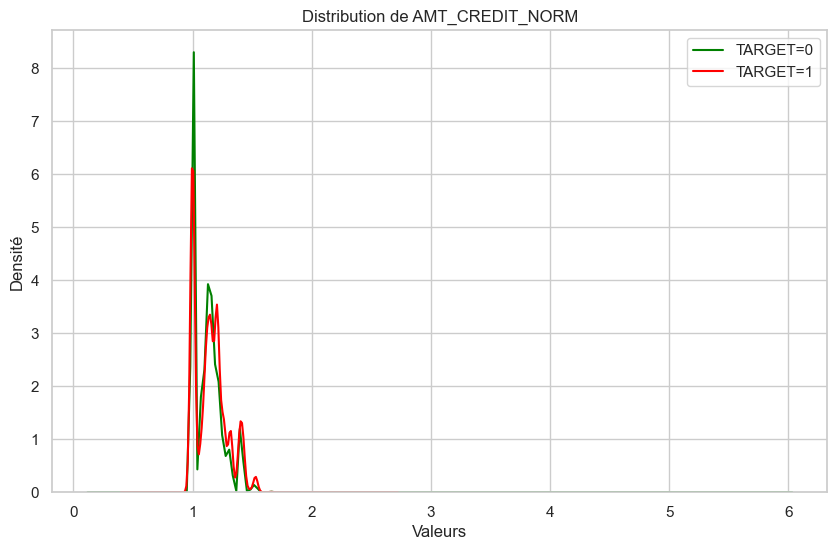

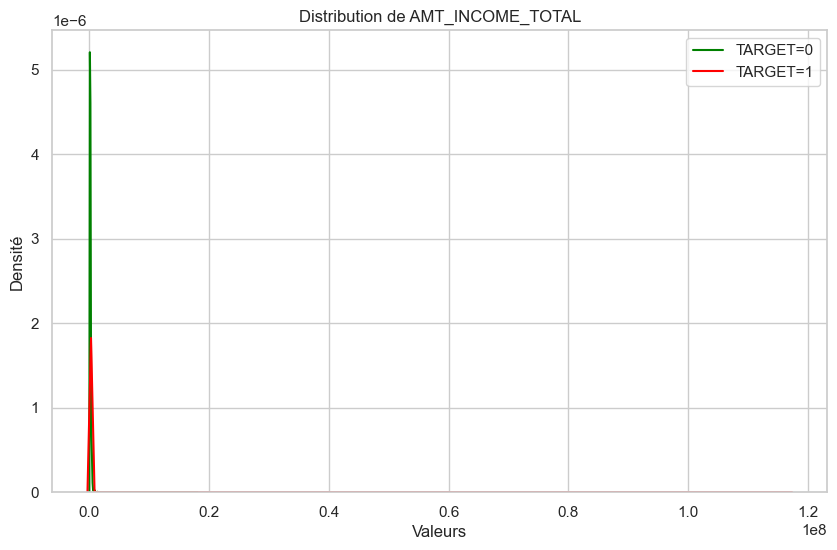

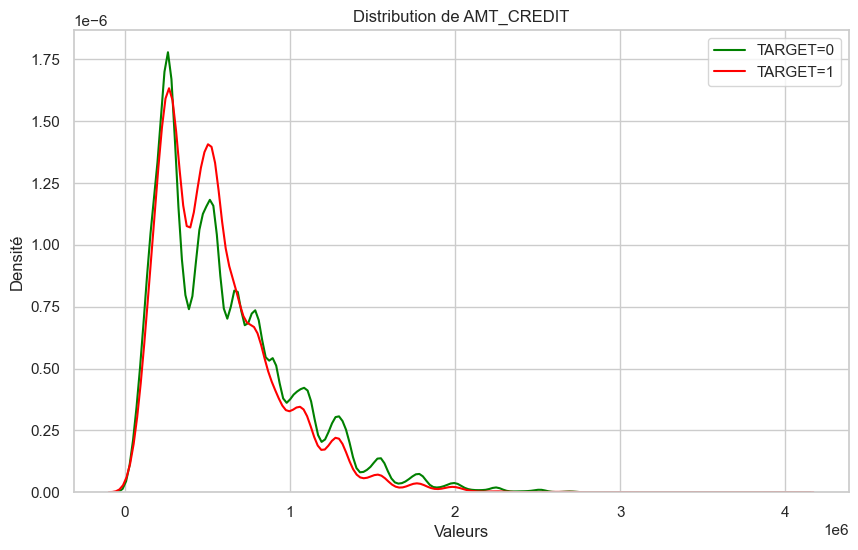

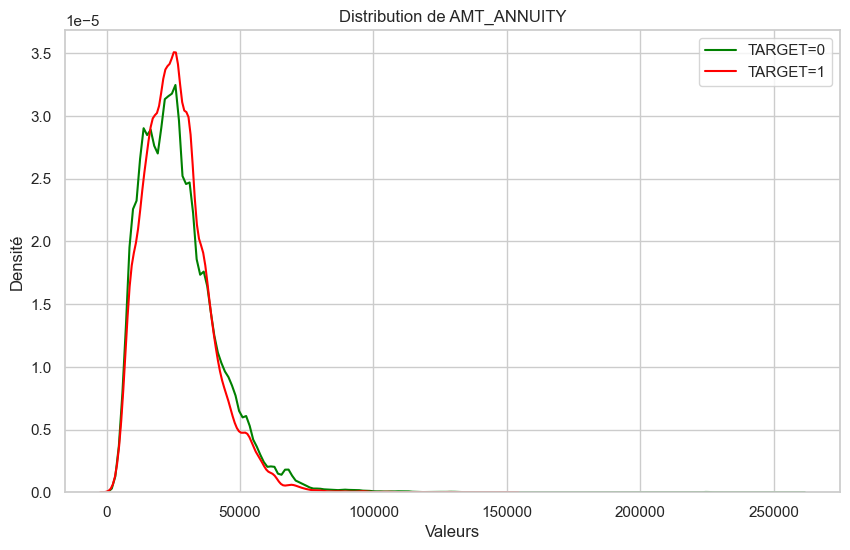

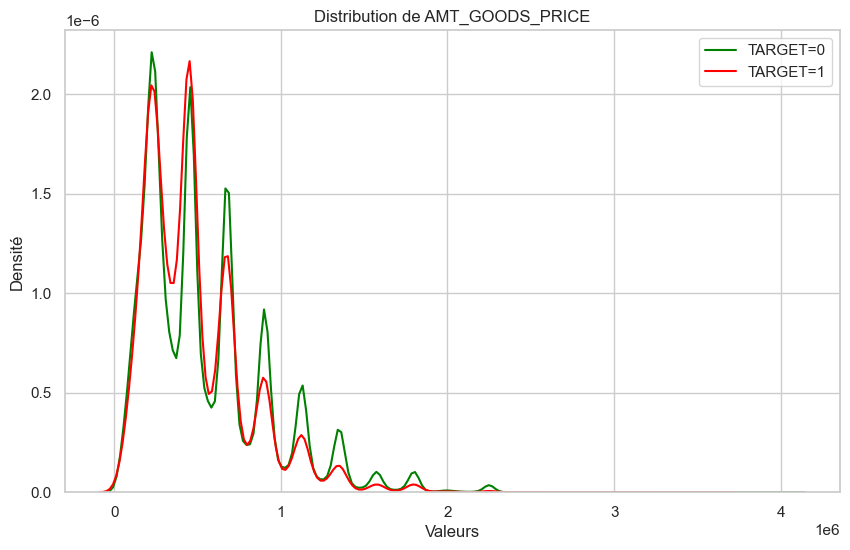

In [57]:
for col in ["AMT_CREDIT_NORM", "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]:
    plt.figure(figsize=(10, 6))
    # Plot des distributions kernel pour TARGET==0 et TARGET==1
    sns.kdeplot(data.loc[data["TARGET"]==0, col], color='green', label='TARGET=0', fill=False)
    sns.kdeplot(data.loc[data["TARGET"]==1, col], color='red', label='TARGET=1', fill=False)

    plt.title(f"Distribution de {col}")
    plt.xlabel('Valeurs')
    plt.ylabel('Densité')
    plt.legend()
    plt.show()

#### Test de rang des variables numériques ? 

In [58]:
numerical_vars=[var for var in numerical_vars if (var not in binary_vars)& (var not in low_category_categorical_vars)]

In [59]:
numerical_vars

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUAT

In [60]:
data[['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,231654.000000,231654.000000,231654.000000,231654.000000,231654.000000,231654.000000
mean,0.006436,0.006915,0.034120,0.267731,0.265832,1.901301
std,0.084073,0.109013,0.203278,0.917531,0.817605,1.870203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [61]:
tested_numerical_variables=[
    "BORROWER_AGE","BORROWER_SENIORITY","BORROWER_FIDELITY",
    "AMT_CREDIT_NORM", "AMT_INCOME_TOTAL","AMT_CREDIT",
    "AMT_ANNUITY","AMT_GOODS_PRICE"
]

In [62]:
for col in tested_numerical_variables:
    mannwhitney_test(data,col,"TARGET")

Variable: BORROWER_AGE
Mann-Whitney U-statistic: 2954132043.5
P-value: 0.0
Variable: BORROWER_SENIORITY
Mann-Whitney U-statistic: 2662420458.5
P-value: 6.14462245390506e-37
Variable: BORROWER_FIDELITY
Mann-Whitney U-statistic: 2743559537.0
P-value: 1.737725932676347e-91
Variable: AMT_CREDIT_NORM
Mann-Whitney U-statistic: 2176153209.0
P-value: 1.5566724368858355e-246
Variable: AMT_INCOME_TOTAL
Mann-Whitney U-statistic: 2624273764.0
P-value: 1.2620198835458554e-19
Variable: AMT_CREDIT
Mann-Whitney U-statistic: 2623630565.5
P-value: 2.653329523205753e-19
Variable: AMT_ANNUITY
Mann-Whitney U-statistic: 2530252073.0
P-value: 0.8407700055894698
Variable: AMT_GOODS_PRICE
Mann-Whitney U-statistic: 2693561537.5
P-value: 9.727169573795193e-58


In [63]:
tested_numerical_variables.remove("AMT_ANNUITY")

In [64]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

class DecisionTreeDiscretizer:
    def __init__(self, max_bins=5, target=None):
        self.tree_max_bins = max_bins
        self.clf = DecisionTreeClassifier(criterion="gini", max_depth=self.tree_max_bins//2,
                                          min_samples_split=0.05, min_samples_leaf=0.05)
        self.target = target

    def fit(self, X_train):
        # Entraîner le modèle sur les données d'entraînement
        self.clf.fit(X_train.values.reshape(-1, 1), self.target)

    def _get_tree_thresholds(self):
        thresholds = set()
        for node in range(self.clf.tree_.node_count):
            if self.clf.tree_.children_left[node] != self.clf.tree_.children_right[node]:  # non-leaf node
                feature = self.clf.tree_.feature[node]
                threshold = self.clf.tree_.threshold[node]
                thresholds.add(threshold)
        return np.array(list(thresholds))

    def get_thresholds(self):
        if hasattr(self.clf, 'tree_') and self.clf.tree_ is not None:
            thresholds_np = self._get_tree_thresholds()
            thresholds = [-np.inf] + sorted(list(set(list(thresholds_np)))) + [np.inf]
            return thresholds
        else:
            raise ValueError("Le classifieur n'est pas entraîné. Utilisez la méthode fit avant d'obtenir les seuils.")

    def transform(self, X):
        # Vérifier si le modèle est entraîné
        if not hasattr(self.clf, 'tree_') or self.clf.tree_ is None:
            raise ValueError("Le classifieur n'est pas entraîné. Utilisez la méthode fit avant de transformer les données de test.")

        thresholds = self.get_thresholds()

        # Utiliser pd.cut pour obtenir les intervalles au lieu des numéros
        intervals = pd.cut(X.values.flatten(), bins=thresholds, include_lowest=True, right=True)
        return intervals



In [65]:
dt_discretizer=DecisionTreeDiscretizer(target=data["TARGET"])
for col in ["AMT_CREDIT_TO_INCOME" , "BORROWER_AGE","BORROWER_SENIORITY","BORROWER_FIDELITY", "AMT_CREDIT_NORM","AMT_ANNUITY","AMT_GOODS_PRICE"]:
    dt_discretizer.fit(data[col])
    data[col]=dt_discretizer.transform(data[col])

In [66]:
formula="TARGET ~ AMT_CREDIT_TO_INCOME + BORROWER_AGE+BORROWER_SENIORITY+BORROWER_FIDELITY+ AMT_CREDIT_NORM"

In [67]:
model_logit=sm.Logit.from_formula(formula=formula,data=data).fit()

Optimization terminated successfully.
         Current function value: 0.262568
         Iterations 7


In [68]:
print(model_logit.summary())

                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               267501
Model:                          Logit   Df Residuals:                   267485
Method:                           MLE   Df Model:                           15
Date:                Tue, 20 Feb 2024   Pseudo R-squ.:                 0.02688
Time:                        22:16:50   Log-Likelihood:                -70237.
converged:                       True   LL-Null:                       -72178.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         -2.6253      0.043    -60.897      0.000